## Supervised learning assignment
- Name: Daan Steur
- Studentnumber: 379943
- Supervisor: Dr. Dave Langers
- Course: DSLS Data Science 3: Deep learning
- Date: 24th of june

# Title

## Assignment


## data source


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import opendatasets as od
import glob as glob
import cv2, os


### Data Download

In [2]:
# # this command will automatically download the dataset in about 4 minutes
# # requirments for this command: pip install opendatasets
# od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download")

# # if the command is not working, you can download the dataset manually
# def create_dir(dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
# # create_dir('rice-image-dataset')

# # Data download link
# download_link = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download"

# # after downloading the dataset, unzip it
# # !unzip rice-image-dataset.zip


### Exploration & preprocessing

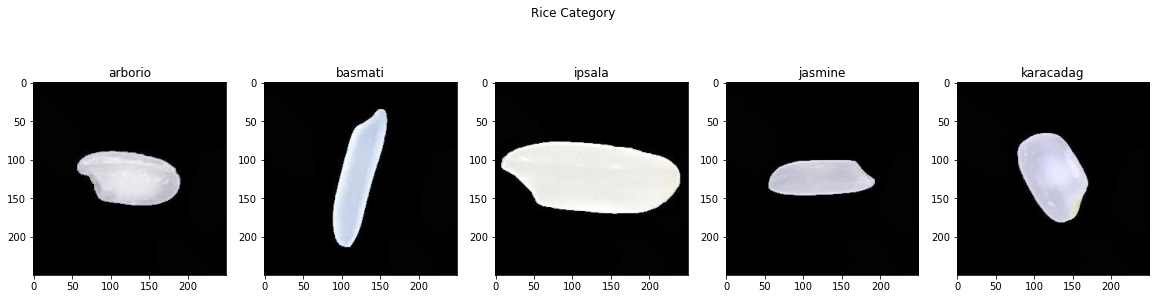

In [3]:
# Separating the categories
data_dir = 'rice-image-dataset/Rice_Image_Dataset/'
arborio = glob.glob(f'{data_dir}Arborio/*.jpg')[:10]
basmati = glob.glob(f'{data_dir}Basmati/*.jpg')[:10]
ipsala = glob.glob(f'{data_dir}Ipsala/*.jpg')[:10]
jasmine = glob.glob(f'{data_dir}Jasmine/*.jpg')[:10]
karacadag = glob.glob(f'{data_dir}Karacadag/*.jpg')[:10]

# Create a figure with all the rice categories
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

Found 60000 images belonging to 5 classes.
(20, 240, 240, 3) float32 (20, 5) float32


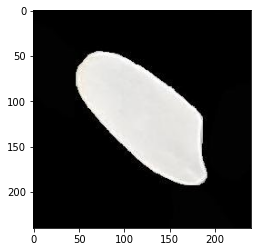

Found 15000 images belonging to 5 classes.
(20, 240, 240, 3) float32 (20, 5) float32


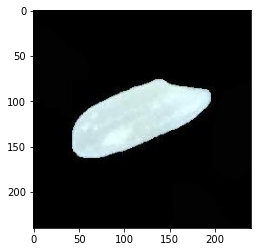

In [4]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(240,240),
                                                      subset='training',
                                                      class_mode='categorical')

for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype, y_train.shape, y_train.dtype)
    break
plt.imshow(x_train[1])
plt.show()

test_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(240,240),
                                                      subset='validation',
                                                      class_mode='categorical')
for x_test, y_test in test_generator:
    print(x_test.shape, x_test.dtype, y_test.shape, y_test.dtype)
    break
plt.imshow(x_test[1])
plt.show()
                                                      
                                            

### Baseline model

In [5]:
# sklearn create a Regression model for image classification





Evalute the model

### Fully-connected neural network model

In [24]:
# neural network
neural = keras.models.Sequential()
# add input layer
neural.add(keras.layers.InputLayer(input_shape=(240,240,3), name='input'))
neural.add(keras.layers.Flatten(name='flatten'))
neural.add(keras.layers.Dense(units=256, activation='relu', name = 'dense_1'))
neural.add(keras.layers.Dense(units=128, activation='relu', name = 'dense_2'))
neural.add(keras.layers.Dense(units=64, activation='relu', name = 'dense_3'))
neural.add(keras.layers.Dense(units=32, activation='relu', name = 'dense_4'))
neural.add(keras.layers.Dense(units=16, activation='relu', name = 'dense_5'))
# output layer
neural.add(keras.layers.Dense(units=5, activation='softmax', name = 'output'))
neural.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 172800)            0         
                                                                 
 dense_1 (Dense)             (None, 256)               44237056  
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 5)                

In [25]:
# compile
neural.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=keras.metrics.CategoricalAccuracy())

In [26]:
# fit 
history_neural = neural.fit(
    train_generator,
    epochs=5,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25)

history_neural.history.keys()

Epoch 1/5
100/100 [==============================] - 54s 517ms/step - loss: 1.1216 - categorical_accuracy: 0.6495 - val_loss: 0.3321 - val_categorical_accuracy: 0.8720
Epoch 2/5
100/100 [==============================] - 46s 460ms/step - loss: 0.3162 - categorical_accuracy: 0.8945 - val_loss: 0.2560 - val_categorical_accuracy: 0.9260
Epoch 3/5
100/100 [==============================] - 46s 456ms/step - loss: 0.2796 - categorical_accuracy: 0.9015 - val_loss: 0.1694 - val_categorical_accuracy: 0.9140
Epoch 4/5
100/100 [==============================] - 44s 435ms/step - loss: 0.1667 - categorical_accuracy: 0.9455 - val_loss: 0.2158 - val_categorical_accuracy: 0.9240
Epoch 5/5
100/100 [==============================] - 45s 447ms/step - loss: 0.2264 - categorical_accuracy: 0.9230 - val_loss: 0.1841 - val_categorical_accuracy: 0.9320


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

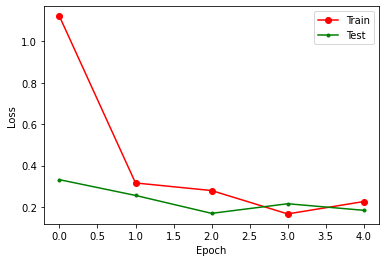

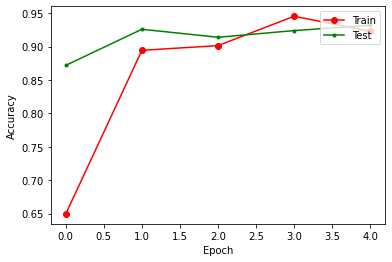

In [31]:
plt.plot(history_neural.history['loss'], marker='o', c='red', label='loss')
plt.plot(history_neural.history['val_loss'], marker='.', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['categorical_accuracy'], marker='o', c='red', label='acc')
plt.plot(history_neural.history['val_categorical_accuracy'], marker='.', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Regularized convolutional neural network model

In [7]:
# convolutional neural network
cov = keras.models.Sequential()

cov.add(keras.layers.InputLayer(input_shape=(240, 240, 3),name='input'))
cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_1'))
# cado_clas.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_2'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_1'))

cov.add(keras.layers.Conv2D(filters = 48, kernel_size=(3,3), activation=keras.activations.relu, name='conv_3'))
# cado_clas.add(keras.layers.Conv2D(filters = 48, kernel_size=(3,3), activation=keras.activations.relu, name='conv_4'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_2'))

cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_5'))
# cado_clas.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_6'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_3'))

cov.add(keras.layers.Conv2D(filters = 96, kernel_size=(3,3), activation=keras.activations.relu, name='conv_7'))
# cado_clas.add(keras.layers.Conv2D(filters = 96, kernel_size=(3,3), activation=keras.activations.relu, name='conv_8'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_4'))

cov.add(keras.layers.Flatten(name='flatten'))
cov.add(keras.layers.Dense(units=64, activation=keras.activations.relu, name='hidden_1'))
cov.add(keras.layers.Dense(units=5, activation=keras.activations.softmax, name='output'))

cov.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 119, 119, 32)      0         
                                                                 
 conv_3 (Conv2D)             (None, 117, 117, 48)      13872     
                                                                 
 pool_2 (MaxPooling2D)       (None, 58, 58, 48)        0         
                                                                 
 conv_5 (Conv2D)             (None, 56, 56, 64)        27712     
                                                                 
 pool_3 (MaxPooling2D)       (None, 28, 28, 64)        0         
                                                                 
 conv_7 (Conv2D)             (None, 26, 26, 96)        5

In [8]:
# compile
cov.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=keras.metrics.CategoricalAccuracy())

In [9]:
# fit 
history_cov = cov.fit(
    train_generator,
    epochs=5,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25)

history_cov.history.keys()

Epoch 1/5
100/100 [==============================] - 139s 1s/step - loss: 0.4828 - categorical_accuracy: 0.8230 - val_loss: 0.2307 - val_categorical_accuracy: 0.9220
Epoch 2/5
100/100 [==============================] - 145s 1s/step - loss: 0.2261 - categorical_accuracy: 0.9230 - val_loss: 0.1970 - val_categorical_accuracy: 0.9400
Epoch 3/5
100/100 [==============================] - 139s 1s/step - loss: 0.1681 - categorical_accuracy: 0.9485 - val_loss: 0.1422 - val_categorical_accuracy: 0.9520
Epoch 4/5
100/100 [==============================] - 136s 1s/step - loss: 0.1306 - categorical_accuracy: 0.9585 - val_loss: 0.1058 - val_categorical_accuracy: 0.9660
Epoch 5/5
100/100 [==============================] - 131s 1s/step - loss: 0.1271 - categorical_accuracy: 0.9580 - val_loss: 0.1220 - val_categorical_accuracy: 0.9740


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

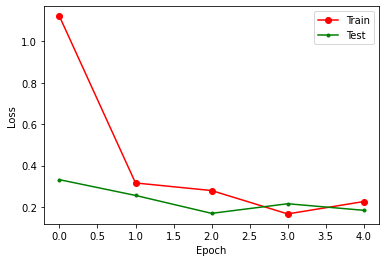

ValueError: 'middle' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

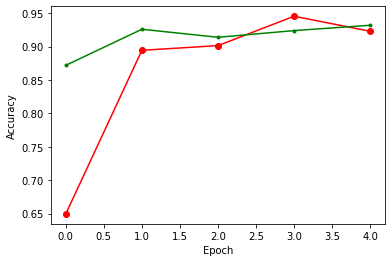

In [28]:
# evaluate

plt.plot(history_cov.history['loss'], marker='o', c='red', label='loss')
plt.plot(history_cov.history['val_loss'], marker='.', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_cov.history['categorical_accuracy'], marker='o', c='red', label='acc')
plt.plot(history_cov.history['val_categorical_accuracy'], marker='.', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()